In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv(r"C:\Users\Sindhu\Downloads\Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.drop(["CustomerId","RowNumber","Surname"],axis=1,inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
df.shape

(10000, 11)

In [9]:
df.rename(columns={'Exited': 'churn', 'Geography': 'country',"CreditScore":"Credit_score","NumOfProducts":"products_number","HasCrCard":"credit_card","IsActiveMember":"active_member","EstimatedSalary":"estimated_salary"}, inplace=True)

In [10]:
df

,Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **EDA**

## **Univariate Analysis**

## **Count Plot**

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_18676\422090570.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df,palette="viridis")


<Axes: xlabel='Gender', ylabel='count'>

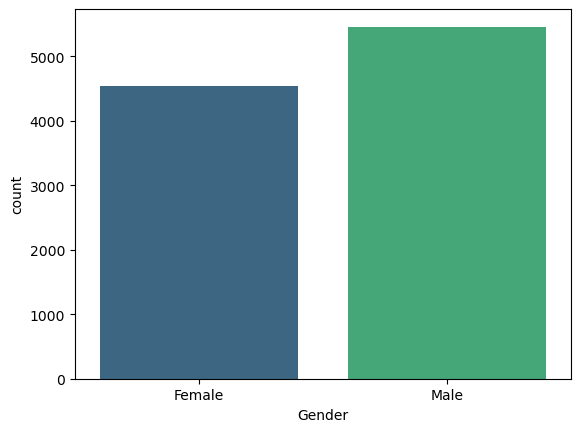

In [14]:
sns.countplot(x='Gender', data=df,palette="viridis")

In [15]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## **Bar Plot**

<Axes: xlabel='Gender'>

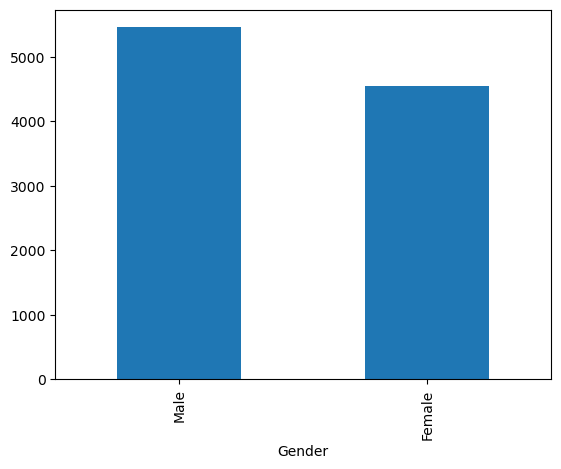

In [17]:
df["Gender"].value_counts().plot(kind="bar")

<Axes: xlabel='churn'>

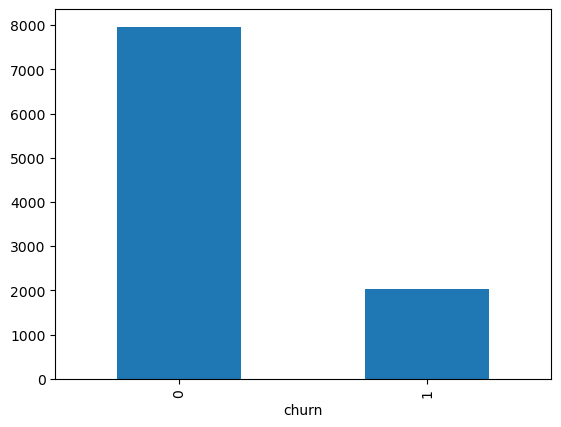

In [18]:
df["churn"].value_counts().plot(kind="bar")

In [19]:
df["churn"].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

## **Pie Plot**

<Axes: ylabel='count'>

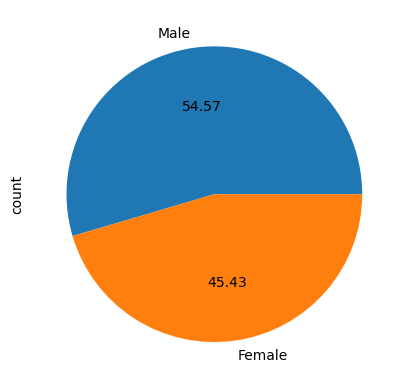

In [21]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

## **Numerical Columns**

## **Histogram**

(array([ 142.,  469., 1030., 1149., 1819., 1810.,  984.,  887.,  568.,
         260.,  294.,  229.,  130.,   78.,   79.,   48.,   12.,    8.,
           2.,    2.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ,
        58.7, 62.4, 66.1, 69.8, 73.5, 77.2, 80.9, 84.6, 88.3, 92. ]),
 <BarContainer object of 20 artists>)

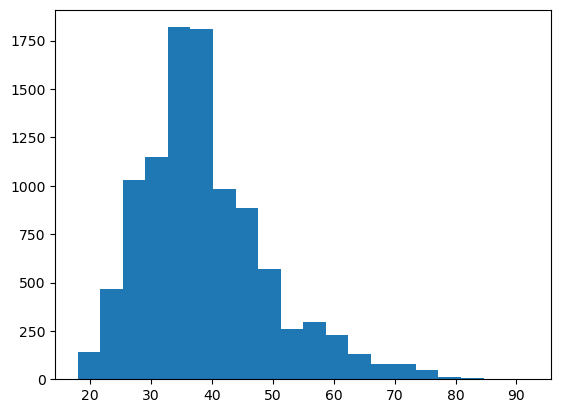

In [24]:
plt.hist(df["Age"],bins=20)

In [25]:
df["Age"].min()

18

In [26]:
df["Age"].max()

92

In [27]:
df["Age"].mean()

38.9218

## **Distribution plot**

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_18676\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

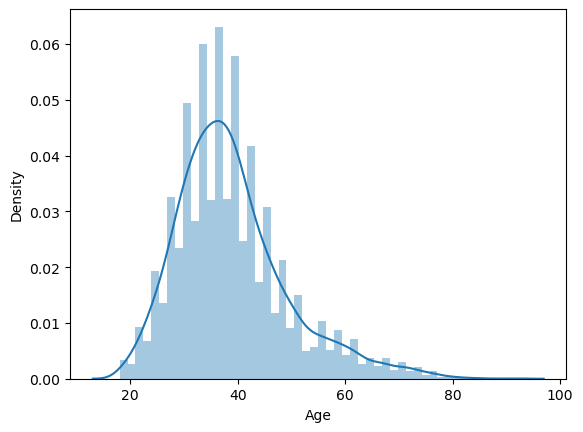

In [29]:
sns.distplot(df["Age"])

In [30]:
df.describe()

,Credit_score,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## **Box Plot**

<Axes: ylabel='Age'>

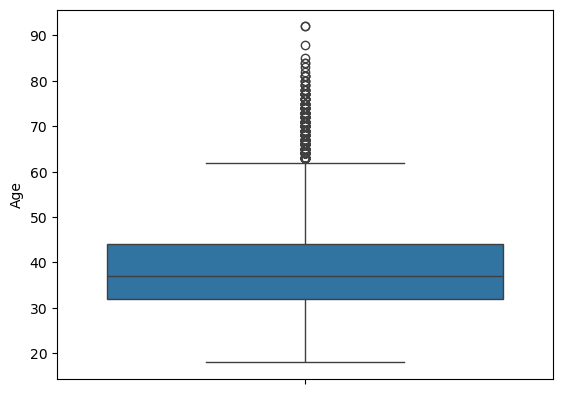

In [32]:
sns.boxplot(df["Age"])

## **Bivariate Analysis**

## **Catagorical to Numerical**

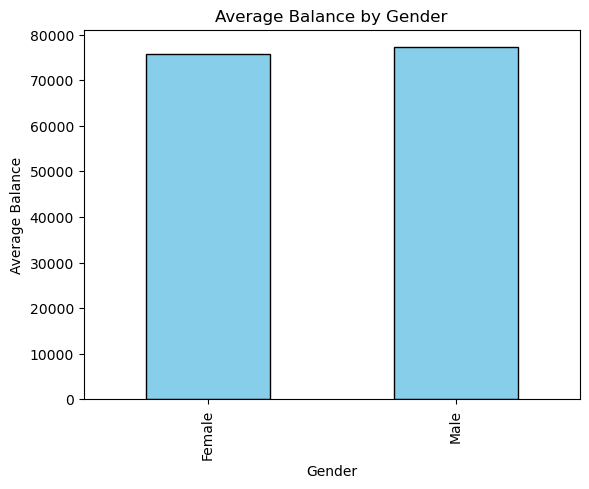

In [35]:
grouped_df = df.groupby('Gender')['Balance'].mean()
grouped_df.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Balance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Balance')
plt.show()

In [36]:
df.groupby(['Gender', 'Balance']).size()

Gender  Balance  
Female  0.00         1654
        3768.69         1
        12459.19        1
        14262.80        1
        23503.31        1
                     ... 
Male    212696.32       1
        214346.96       1
        221532.80       1
        222267.63       1
        250898.09       1
Length: 6384, dtype: int64

In [37]:
df.groupby("Gender")["Gender"].value_counts()

Gender
Female    4543
Male      5457
Name: count, dtype: int64

## **Numerical to Numerical**

In [40]:
data = df.groupby('Age')['Balance'].mean()

In [41]:
data

Age
18     79169.57500
19     70502.53963
20     76038.89000
21     75926.88283
22     68213.74881
          ...     
83    123356.63000
84     90057.86500
85         0.00000
88         0.00000
92    123794.77500
Name: Balance, Length: 70, dtype: float64

C:\Users\Sindhu\AppData\Local\Temp\ipykernel_18676\1673768638.py:1: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df['Age'], df['Balance'], color='skyblue', edgecolor='black',marker ='x')


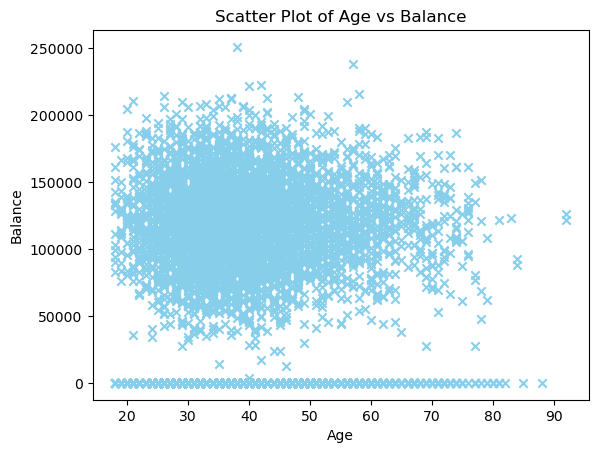

In [42]:
plt.scatter(df['Age'], df['Balance'], color='skyblue', edgecolor='black',marker ='x')
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

## **Categorical vs Categorical**

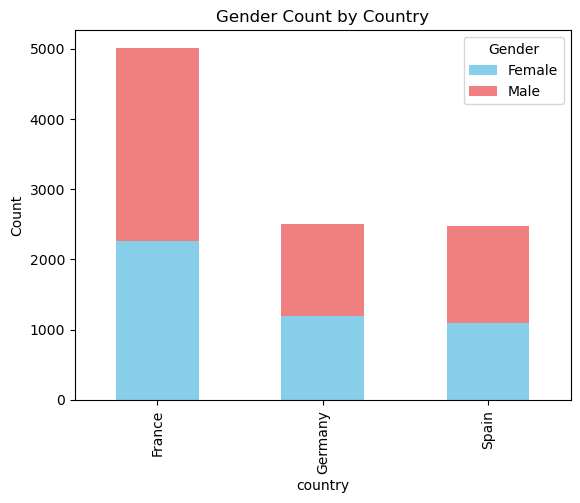

In [44]:
gender_counts = df.groupby(['country', 'Gender']).size().unstack()

gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

plt.title('Gender Count by Country')
plt.xlabel('country')
plt.ylabel('Count')
plt.show()

## **Encoding**

In [46]:
df

,Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [55]:
df["Gender"] = df["Gender"].map({"Male":1, "Female":0})

In [56]:
df["country"] = df["country"].map({"France":1, "Germany":0, "Spain":2})

In [57]:
df

,Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


## **Train Test Split**

In [59]:
X = df.drop("churn",axis=1)
y = df["churn"]

In [60]:
X.shape

(10000, 10)

In [61]:
y.shape

(10000,)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Training Model**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logre = LogisticRegression()

In [67]:
logre.fit(X_train,y_train)

C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = logre.predict(X_test)

In [69]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score of logre Boost:",accuracy)

Accuracy Score of logre Boost: 0.8015


In [71]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)

C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [72]:
y_pred = ada.predict(X_test)

In [73]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score of ADA Boost:",accuracy)

Accuracy Score of ADA Boost: 0.8575


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [79]:
models = {
    "logre": LogisticRegression(),
    "dt": DecisionTreeClassifier(),
    "rf": RandomForestClassifier(),
    "ada": AdaBoostClassifier()
}

for name,mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"{name} with accuracy {accuracy_score(y_test,y_pred)}")


C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logre with accuracy 0.8015
dt with accuracy 0.784
rf with accuracy 0.867


C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ada with accuracy 0.8575


## **Model Selection**

In [83]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = mod.predict(X_test)

In [85]:
df

,Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,0,36,7,0.00,1,0,1,42085.58,1
9998,772,0,1,42,3,75075.31,2,1,0,92888.52,1


## **Predictive system**

In [91]:
def prediction(Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary):
    features = np.array([[Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary]])

    pred = rf.predict(features).reshape(1,-1)
    return pred[0]

In [92]:
# 619--*1--*0--*42--*2--*0.00--*1--*1--*1--*101348.88--*
# 608--*2--*0--*41--*1--*83807.86--*1--*0--*1--*112542.58--*

Credit_score = 619
country = 0
Gender = 0
Age = 42
Tenure = 2
Balance = 0.00
products_number = 1
credit_card = 1
active_member = 1
estimated_salary = 101348.88

pred = prediction(Credit_score,country,Gender,Age,Tenure,Balance,products_number,credit_card,active_member,estimated_salary)

C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [93]:
pred

array([0], dtype=int64)

In [96]:
if pred == 0:
    print("This customer is still there")
else:
    print("This customer has left")

This customer is still there


In [99]:
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

models = {
    "logre": LogisticRegression(),
    "dt": DecisionTreeClassifier(),
    "rf": RandomForestClassifier(),
    "ada": AdaBoostClassifier()
}

# To store results
results = []

for name, mod in models.items():
    # Start training timer
    start_train_time = time.time()
    
    # Fit the model on training data
    mod.fit(X_train, y_train)
    
    # Stop training timer
    train_time = time.time() - start_train_time
    
    # Start prediction timer
    start_test_time = time.time()
    
    # Predictions on test data
    y_pred = mod.predict(X_test)
    
    # Stop prediction timer
    test_time = time.time() - start_test_time
    
    # Get accuracy scores
    train_score = mod.score(X_train, y_train)
    test_score = mod.score(X_test, y_test)
    
    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and f1-score for each class
    precision_class_0 = report['0']['precision']
    recall_class_0 = report['0']['recall']
    f1_class_0 = report['0']['f1-score']
    
    precision_class_1 = report['1']['precision']
    recall_class_1 = report['1']['recall']
    f1_class_1 = report['1']['f1-score']
    
    # Store the results
    results.append({
        "Model": name,
        "Train Score": train_score,
        "Test Score": test_score,
        "Train Time (s)": train_time,
        "Test Time (s)": test_time,
        "Precision (Class 0)": precision_class_0,
        "Recall (Class 0)": recall_class_0,
        "F1 (Class 0)": f1_class_0,
        "Precision (Class 1)": precision_class_1,
        "Recall (Class 1)": recall_class_1,
        "F1 (Class 1)": f1_class_1
    })

# Convert results to a DataFrame for easy display
import pandas as pd
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sindhu\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


   Model  Train Score  Test Score  Train Time (s)  Test Time (s)  \
0  logre     0.789125      0.8015        0.140017       0.005349   
1     dt     1.000000      0.7805        0.121176       0.000000   
2     rf     0.999875      0.8690        3.024348       0.085462   
3    ada     0.858125      0.8575        0.858472       0.032732   

   Precision (Class 0)  Recall (Class 0)  F1 (Class 0)  Precision (Class 1)  \
0             0.813147          0.977598      0.887821             0.470588   
1             0.875321          0.847542      0.861208             0.448198   
2             0.884946          0.962041      0.921884             0.758893   
3             0.883411          0.947729      0.914440             0.695652   

   Recall (Class 1)  F1 (Class 1)  
0          0.081425      0.138829  
1          0.506361      0.475508  
2          0.488550      0.594427  
3          0.488550      0.573991  
